<a href="https://colab.research.google.com/github/aviax1/AE1/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**dependencies**

In [17]:
# used snniped from https://github.com/L1aoXingyu/pytorch-beginner/
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
from tensorflow.keras.datasets import mnist
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np

**initial**

In [18]:
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()
num_epochs=200      #
batch_size = 20    #
image_size=784      #
hidden_size=128     #
lv_size = 64        # Latent Variable 
learning_rate=1e-4  #
cret = nn.MSELoss() # criterion

**build model**

In [19]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(image_size, image_size),nn.ReLU(True), nn.Linear(image_size, hidden_size),
            nn.ReLU(True), nn.Linear(hidden_size, hidden_size), nn.ReLU(True), nn.Linear(hidden_size, lv_size))
        self.decoder = nn.Sequential(
            nn.Linear(lv_size, hidden_size),nn.ReLU(True),nn.Linear(hidden_size, hidden_size),
            nn.ReLU(True),nn.Linear(hidden_size, hidden_size),nn.ReLU(True), nn.Linear(hidden_size, image_size), nn.Tanh())

    def forward(self, x):
        return self.decoder(self.encoder(x))

**model setting**

In [20]:
model = autoencoder()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

class DigitDataSet(Dataset):
  def __init__(self, dataset):
      self.dataset = dataset
      self.transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5], [0.5])])

  def __len__(self):
      return len(self.dataset)

  def __getitem__(self, idx):
      if torch.is_tensor(idx):
          idx = idx.tolist()
      return self.transform( self.dataset[idx,:,:])

def images_row(dis_images,title,add_to_index=0, images_in_row=5):
  if( len(np.shape(dis_images)) == 2):
    dis_images=dis_images[0:images_in_row,:]
  else:
    dis_images=dis_images[0:images_in_row,0,:,:]
  for i in range(len(dis_images)):
    ax = plt.subplot(30, images_in_row, i+add_to_index + 1)
    plt.imshow(dis_images[i].reshape(28, 28))
    plt.title( title)
    plt.gray()

def visual_epoch(epoch_num,model,dataloader):
  for data in dataloader:
      input_imgs = data
      imgs = Variable(input_imgs.view(input_imgs.size(0), -1))
      output_imgs = model(imgs)
      images_row(input_imgs,"org ",5*epoch_num)
      images_row(output_imgs.detach().numpy(),"rec ",5*(epoch_num+1))
       

**train model by digit**

*****
start traning Model for digit 0



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


epoch [1/200], loss:0.1634
epoch [2/200], loss:0.1792
epoch [3/200], loss:0.1434
epoch [4/200], loss:0.1156
epoch [5/200], loss:0.1279
epoch [6/200], loss:0.1451
epoch [7/200], loss:0.1151
epoch [8/200], loss:0.1021
epoch [9/200], loss:0.1138
epoch [10/200], loss:0.0921

finish traning Model Number 0

*****



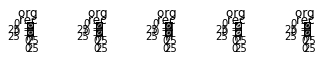

In [16]:
for by_digit in range(10):
  print("*****\nstart traning Model for digit " +str(by_digit) +"\n")
  dataloader = DataLoader(DigitDataSet(xtrain[ytrain==by_digit]), batch_size=batch_size,shuffle=True, num_workers=4)
  
  visual_counter=0
  for epoch in range(epoch_num):
    for data in dataloader:
      input_imgs = data
      imgs = Variable(input_imgs.view(input_imgs.size(0), -1))
      output_imgs = model(imgs)
      loss = cret(output_imgs, imgs)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    #if epoch%3==0 :
    #  visual_epoch(visual_counter,model,dataloader)
    print('epoch [{}/{}], loss:{:.4f}' .format(epoch + 1, num_epochs, loss.data))
    

  torch.save(model.state_dict(), './ae_'+str(by_digit)+'.pth')
  print("\nfinish traning Model Number " +str(by_digit) +"\n")
  print("*****\n")